# <span style="color:red"> Lecture 22 - Advanced Plots  </span>

<font size = "3">

In this lecture we will work on the aesthetics of graphs. We will try to recreate the following plot:

<img src="figures/tweet-Jan22-2023.jpg" alt="drawing" width="350"/>

<font size = "3">

- This was posted on Twitter (later re-named to "X") by the Federal Reserve Bank of St. Louis.

- I chose this plot for two reasons:
    - Faithfully recreating the plot requires us to use a lot of plotting options we haven't covered before.
    - The plot is **extremely misleading**. Plots are primarily used for communicating results to others, and we should try to present information as accurately as possible. (We should also know when we're being misled.)

- The plot comes from [this article](ow.ly/MyOx50MwEyF). 

- I downloaded the data from the Stockholm International Peace Research Institute back in 2023. The data in the plot is in terms of 2020 U.S. dollars, and is no longer available. You can download updated data expressed in terms of 2023 U.S. dollars from [https://www.sipri.org/databases/milex](https://www.sipri.org/databases/milex)


### 1. Import necessary libraries and load the data

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv("data_raw/military_spending.csv")
df.dtypes

year               int64
United_States    float64
India            float64
China            float64
Russia           float64
U.K.             float64
Saudi_Arabia     float64
dtype: object

### 2. Convert data to right units

<font size = "3">

- The .csv file we just loaded contains the military expenditures of the six countries in terms of "millions of 2020 U.S. dollars".

- The original plot shows data expressed in terms of "billions of 2020 U.S. dollars".

- So we'll make a copy of the DataFrame with correct units

In [3]:
# df is in millions of 2020 U.S. dollars
# 1 billion = 1,000 * 1 million

# create function to convert millions to billions
def conversion(millions):
    return millions*1e-3

# make "year" the index column. 
# We don't need to convert this one
df.set_index("year", inplace=True)

# Apply the conversion function to the DataFrame
df_billions = df.apply(conversion)

### 3. Make the plot

<font size = "3">

- Now we can try and make the plot.

- We'll use ``matplotlib.pyplot`` first.

- The 5 non-U.S. countries have their data plotted with respect to the left y-axis. The U.S. gets its own axis, the right y-axis.

- We will proceed *slowly*, and fill in the next code cell piece-by-piece.

- A convenient way to create a plot with two y-axes is to separate the "figure" and the "axis" using ``plt.subplots``

- For convenience, here's the plot we're trying to create:

<!-- <img src="figures/tweet-Jan22-2023.jpg" alt="drawing" width="350"/> -->

<class 'matplotlib.figure.Figure'>
<class 'matplotlib.axes._axes.Axes'>
<class 'matplotlib.axes._axes.Axes'>


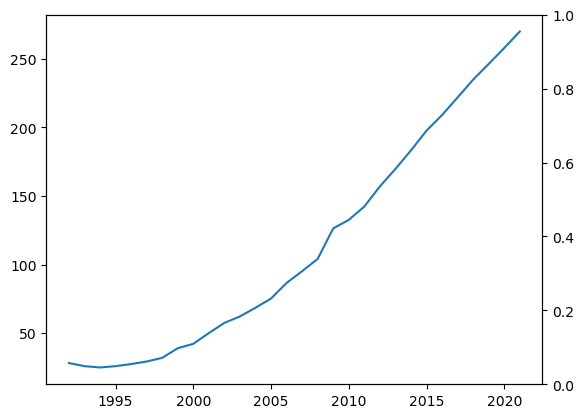

In [4]:
# Finished code is in the next cell

# choose which DataFrame we're going to use for plotting
df_plot = df_billions.reset_index()

# create matplotlib.Figure object 
# and matplotlib.Axes object
fig, ax1 = plt.subplots()

# create a "twin" that shares the x-axis
ax2 = ax1.twinx()

# start off by plotting the "China" curve
ax1.plot("year", "China", data = df_plot)

print(type(fig))
print(type(ax1))
print(type(ax2))

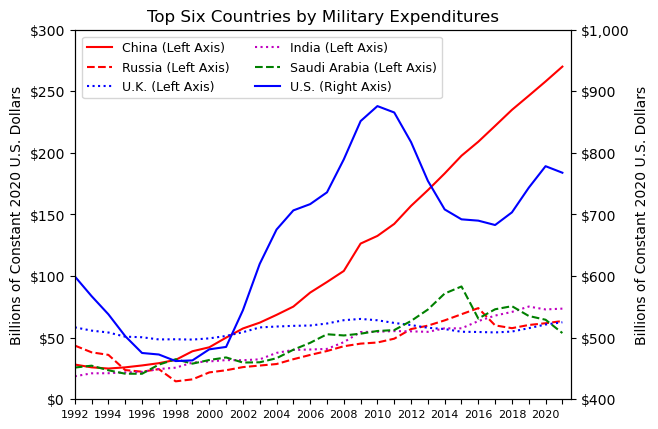

In [5]:
# choose which DataFrame we're going to use for plotting
df_plot = df_billions.reset_index()

# create matplotlib.Figure object 
# and matplotlib.Axes object
fig, ax1 = plt.subplots()

# create a "twin" that shares the x-axis
ax2 = ax1.twinx()

ax1.plot("year", "China", data=df_plot, color = "r")
ax1.plot("year", "Russia", data=df_plot, color = 'r', linestyle = '--' )
ax1.plot("year", "U.K.", data=df_plot, color = 'b', linestyle = ':' )
ax1.plot("year", "India", data=df_plot, color = 'm', linestyle = ':')
ax1.plot("year", "Saudi_Arabia", data=df_plot, color='g', linestyle = '--')

ax2.plot("year", "United_States", data=df_plot, color = "b")

# set axis limits
ax1.set_ylim(0, 300)
ax2.set_ylim(400, 1000)
ax1.set_xlim(1992, 2021.5)

# change y-axis ticks
ax1.set_yticks([0, 50, 100, 150, 200, 250, 300])
ax1.set_yticklabels(["$0", "$50", "$100", "$150", "$200", "$250", "$300"])

ax2.set_yticks([400, 500, 600, 700, 800, 900, 1000])
ax2.set_yticklabels(["$400", "$500", "$600", "$700", "$800", "$900", "$1,000"])

# change x-axis ticks
xticks = range(1992, 2022)
xtick_labels = []
for year in range(1992, 2022, 2):
    xtick_labels.append(year)
    xtick_labels.append("")

ax1.set_xticks(xticks)
ax1.set_xticklabels(xtick_labels, fontsize = 8)

plt.title("Top Six Countries by Military Expenditures")

ax1.set_ylabel("Billions of Constant 2020 U.S. Dollars")

ax2.set_ylabel("Billions of Constant 2020 U.S. Dollars")

# create legend

legend_labels = ["China (Left Axis)", "Russia (Left Axis)", "U.K. (Left Axis)", 
    "India (Left Axis)", "Saudi Arabia (Left Axis)", "U.S. (Right Axis)"]

fig.legend(legend_labels, ncol = 2, loc = (0.125, .77), fontsize = 9)

plt.show()

<font size = "3">

That was a lot of commands! It's usually a good idea to separate your code into two parts:

- Load your data, clean it, do the necessary computations and analysis. Make some quick plots for your own use, and then save everything you will need for creating the plots.

- Create a professional looking plot in a separate code. Load in what you saved before, then use all the detailed plotting functions to create a nice-looking plot

I tried to do this on a small scale here, by doing the conversion in one cell, then creating a new variable called ``df_plot`` in another cell followed by all the plotting commands.

Later, we'll see how you can do the plotting in an entirely different notebook using the ``pickle`` library.

### 4. Make a better plot

- Hopefully you're convinced I have provided the same data as the makers of the original figure.

- Now we'll plot everything on the same y-axis.

**Exercise:** Make the plot below more "professional" looking. Add axis labels, a title, change the legend so there are no underscores. Make other changes like ticks/tick-labels, color, and linestyles if you think they make for a better-looking plot.

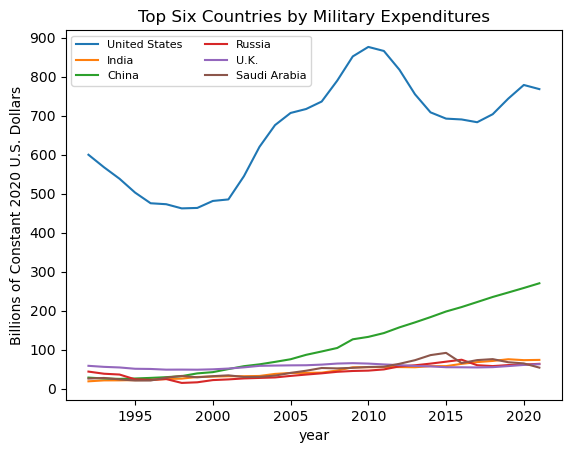

In [ ]:
ax = df_billions.plot()
legend_labels = ["United States", "India", "China", "Russia", "U.K.", "Saudi Arabia"]
ax.legend(legend_labels, loc = "upper left", ncol = 2, fontsize = 8)
ax.set_yticks([0, 100, 200, 300, 400, 500, 600, 700, 800, 900])
ax.set_ylabel("Billions of Constant 2020 U.S. Dollars")
plt.title("Top Six Countries by Military Expenditures")
plt.show()

<font size = "3">

The U.S. is clearly the top military spender. 

Now, let's create a Pandas Series with the combined military budgets of the next top 5 countries.

In [11]:
next_5 = df_billions.iloc[:,1:].sum(axis = 1)
next_5

year
1992    174.5912
1993    168.1236
1994    159.8875
1995    143.0069
1996    143.0999
1997    155.0264
1998    153.3861
1999    162.3228
2000    176.0604
2001    190.7638
2002    199.5426
2003    210.3329
2004    227.1352
2005    247.6470
2006    268.6821
2007    289.5411
2008    309.5722
2009    344.6047
2010    353.0434
2011    365.0060
2012    392.9162
2013    415.1141
2014    447.7618
2015    470.6831
2016    466.6718
2017    477.1333
2018    494.0742
2019    507.2338
2020    517.8564
2021    523.3248
dtype: float64

<font size = "3">

And create a new plot:

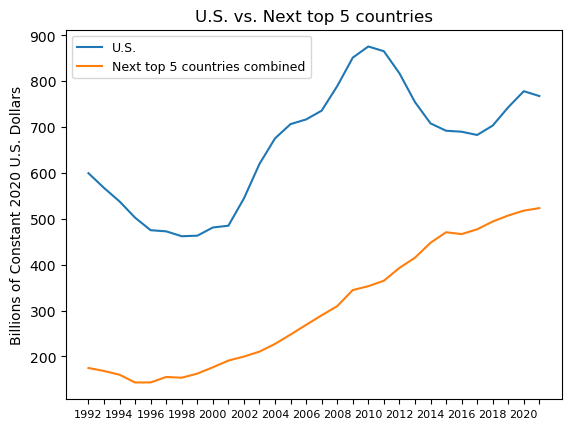

In [ ]:
df_plot = df_billions.reset_index()

plt.plot("year", "United_States", data = df_plot)
plt.plot(df_plot["year"], next_5)
plt.legend(["U.S.", "Next top 5 countries combined"], fontsize = 9)
plt.ylabel("Billions of Constant 2020 U.S. Dollars")
plt.title("U.S. vs. Next top 5 countries")

# change x-axis ticks
xticks = range(1992, 2022)
xtick_labels = []
for year in range(1992, 2022, 2):
    xtick_labels.append(year)
    xtick_labels.append("")

plt.xticks(xticks, xtick_labels, fontsize = 8)
plt.show()

<font size = "3">

**Exercise:** "Professionalize" the plot above

### 5. When should you use two axes?

- If you are plotting two quantities with different scales/units, it may make sense to plot them together with two different axes.

- For example, the S&P 500 and the Dow Jones are both measures of the economy, but with different units (and scale).

**Exercise:** Load the data from the "financial.csv" file. Create a two-axis plot of the S&P 500 and Dow Jones. (Don't forget to convert the "date_str" column!)

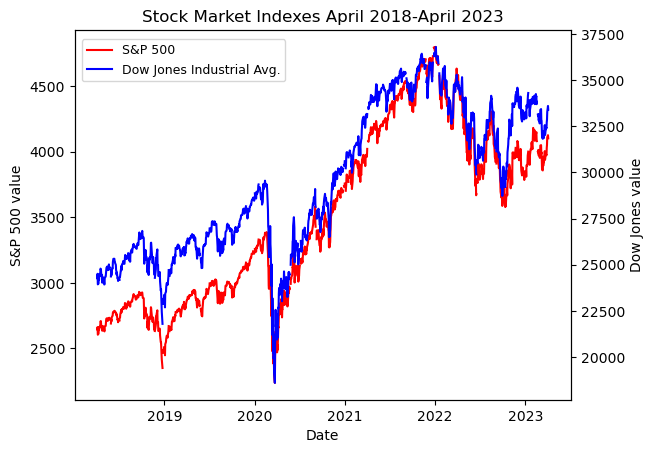

In [42]:
# your code here

df = pd.read_csv("data_raw/financial.csv")

df["date"] = pd.to_datetime(df["date_str"])

# choose which DataFrame we're going to use for plotting
df_plot = df

# create matplotlib.Figure object 
# and matplotlib.Axes object
fig, ax1 = plt.subplots()

# create a "twin" that shares the x-axis
ax2 = ax1.twinx()

ax1.plot("date", "sp500", data=df_plot, color = "r")
ax2.plot("date", "djia", data = df_plot, color = "b")

ax1.set_ylabel("S&P 500 value")

ax2.set_ylabel("Dow Jones value")

ax1.set_xlabel("Date")



plt.title("Stock Market Indexes April 2018-April 2023")

# create legend

legend_labels = ["S&P 500", "Dow Jones Industrial Avg."]

fig.legend(legend_labels, loc = (0.125, .82), fontsize = 9)

plt.show()

### 6. Separating data analysis and plotting

<font size = "3">

- As stated above, it can be a good idea to completely separate the plotting from the data analysis, even doing so in separate notebooks (or scripts).

- How do we compute something in one notebook and use it in another?

- One way to do so is through the ``pickle`` library.

- Below, we will: (i) import this library, (ii) repeat the calculations needed to get the "df_billions" DataFrame (iii) create a dictionary containing both DataFrames, (iv) save it to a file using ``pickle``

In [43]:
# import pickle library
import pickle 

# repeat code from above
df = pd.read_csv("data_raw/military_spending.csv")

def conversion(millions):
    return millions*1e-3

df.set_index("year", inplace=True)

df_billions = df.apply(conversion)

next_5 = df_billions.iloc[:,1:].sum(axis = 1)


In [44]:
# create dictionary
my_save_dict = {"spending_millions" : df, "spending_billions" : df_billions, "combined_spending" : next_5}

# choose a filename
my_filename = "data_raw/plot_data.pickle"

# Save the dictionary to a "pickle" file.
# "wb" means "write" + "binary"
with open(my_filename, 'wb') as file:
    pickle.dump(my_save_dict, file)


In [45]:
# Using ".pickle" is the recommended extension for a file created with pickle. 
# But you can name it whatever:

my_filename = "data_raw/plot_data.peter"
with open(my_filename, 'wb') as file:
    pickle.dump(my_save_dict, file)


<font size = "3">

Now we can move to another notebook, load the files we save and do all the plotting there!

<font size = "3">

**Exercise:** Load in the data from "financial.csv" and save it to a DataFrame. Add the following columns:

- A "date" column created by converting the "date_str" column to datetime format.

- A "growth_sp500" and "growth_djia" column consisting of the percentage growth of the S&P 500 and Dow Jones (see Lecture 18)

- Create a dictionary containing this DataFrame (so the dictionary will have only one element)

- Save the dictionary to a file using ``pickle``.

- In a separate notebook, load in the file, and plot (time vs. growth_sp500) and (time vs. growth_djia) on a single figure (see Lecture 18)

In [47]:
# your code here.

df = pd.read_csv("data_raw/financial.csv")

df["date"] = pd.to_datetime(df["date_str"])


df["growth_sp500"] = df["sp500"].diff() / df["sp500"].shift(1) * 100
df["growth_djia"] = df["djia"].diff() / df["djia"].shift(1) * 100

save_dict = {"financial_df" : df}


# choose a filename
my_filename = "data_raw/file1.pickle"

# Save the dictionary to a "pickle" file.
# "wb" means "write" + "binary"
with open(my_filename, 'wb') as file:
    pickle.dump(save_dict, file)

<font size = "3">

**Exercise:** Do the same thing as the above exercise, but instead of adding new columns to the DataFrame, do the following:

- Create a Pandas Series object named ``date`` by converting the "date_str" column to datetime format.

- Create two Pandas Series named ``growth_sp500`` and ``growth_djia`` consisting of the percentage growth of the S&P 500 and Dow Jones (see Lecture 18).

- Create a dictionary containing the DataFrame and the Series you created (so the dictionary will have 4 elements)

- Save the dictionary to a file using ``pickle``.

- In a separate notebook, load in the file, and plot (time vs. growth_sp500) and (time vs. growth_djia) on a single figure (see Lecture 18)

In [48]:
# your code here

# your code here.

df = pd.read_csv("data_raw/financial.csv")

date = pd.to_datetime(df["date_str"])


growth_sp500 = df["sp500"].diff() / df["sp500"].shift(1) * 100
growth_djia = df["djia"].diff() / df["djia"].shift(1) * 100

save_dict = {"financial_df" : df, "date" : date, "sp_growth" : growth_sp500, 
    "dj_growth" : growth_djia}


# choose a filename
my_filename = "data_raw/file2.pickle"

# Save the dictionary to a "pickle" file.
# "wb" means "write" + "binary"
with open(my_filename, 'wb') as file:
    pickle.dump(save_dict, file)


# <span style="color:red">  More resources  </span>

<font size = "5">

"Anatomy of a figure"

Figure source + more details and tutorials: https://matplotlib.org/stable/gallery/showcase/anatomy.html


<img src="figures/structure_plot.png" alt="drawing" width="550"/>

<font size = "5">

More on subplot syntax:


https://matplotlib.org/stable/gallery/subplots_axes_and_figures/subplots_demo.html

<font size = "5">

List of colors:

https://matplotlib.org/stable/gallery/color/named_colors.html

<font size = "5">

More options

https://problemsolvingwithpython.com/06-Plotting-with-Matplotlib/06.05-Multi-Line-Plots/